# Data Analysis Project: Air Quality
- Name: Wadi Wahyudin

Pertanyaan Bisnis # Pertanyaan Bisnis:
1. Menganalisis kumpulan data PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Tiantan, Wanliu, dan Changping), apa tren polusi udara selama lima tahun terakhir?
2. Apakah terdapat korelasi antara parameter cuaca, seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP), dengan tingkat polusi PM2.5 selama lima tahun terakhir?

## A. Preparing Libraries:

Mengimpor berbagai pustaka Python untuk visualisasi data, termasuk NumPy untuk operasi numerik, Panda untuk manipulasi data, Seaborn untuk visualisasi data yang menarik, dan Matplotlib untuk menghasilkan plot.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## B. Data Wrangling

### 1. Gathering Data

Dalam sel berikut ini, saya menyimpan tiga file CSV ke dalam tiga variabel yang berbeda dan kemudian menggabungkan ketiga file ini menjadi satu dalam satu variabel. Penting untuk memastikan bahwa struktur CSV konsisten di semua kumpulan data sebelum menggabungkannya.

In [21]:
file_path1 = '/content/PRSA_Data_Tiantan_20130301-20170228.csv'
file_path2 = '/content/PRSA_Data_Wanliu_20130301-20170228.csv'
file_path3 = '/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv'

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

dfs = [df1, df2, df3]
df = pd.concat(dfs, ignore_index=True)

df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
105188,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
105189,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
105190,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [22]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### 2. Assesing Data

Dalam sel berikut, saya akan menilai integritas data dengan memeriksa jumlah baris di setiap kolom, menunjukkan dengan tepat keberadaan nilai nol, dan meneliti tipe data yang terkait dengan setiap kolom.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       105192 non-null  int64  
 1   year     105192 non-null  int64  
 2   month    105192 non-null  int64  
 3   day      105192 non-null  int64  
 4   hour     105192 non-null  int64  
 5   PM2.5    103437 non-null  float64
 6   PM10     103827 non-null  float64
 7   SO2      102830 non-null  float64
 8   NO2      102624 non-null  float64
 9   CO       100957 non-null  float64
 10  O3       101164 non-null  float64
 11  TEMP     105133 non-null  float64
 12  PRES     105133 non-null  float64
 13  DEWP     105133 non-null  float64
 14  RAIN     105133 non-null  float64
 15  wd       104912 non-null  object 
 16  WSPM     105151 non-null  float64
 17  station  105192 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 14.4+ MB


Dari output sel sebelumnya, teridentifikasi bahwa ada beberapa nilai yang tidak ada. Setelah itu, saya akan memeriksa data untuk menentukan adanya pencilan.

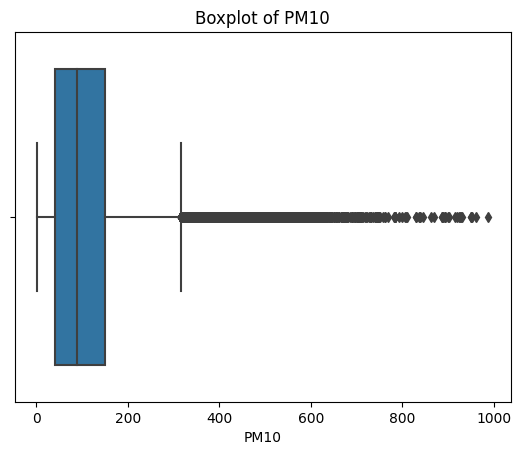

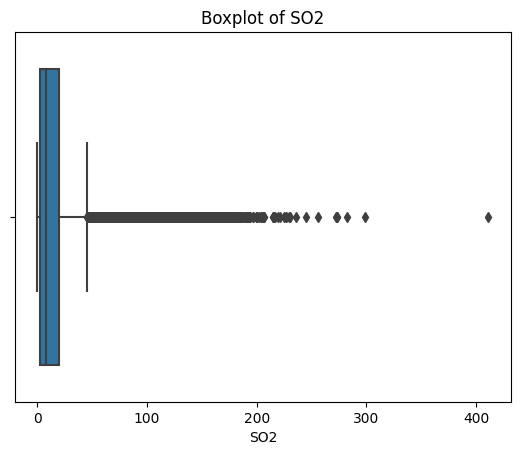

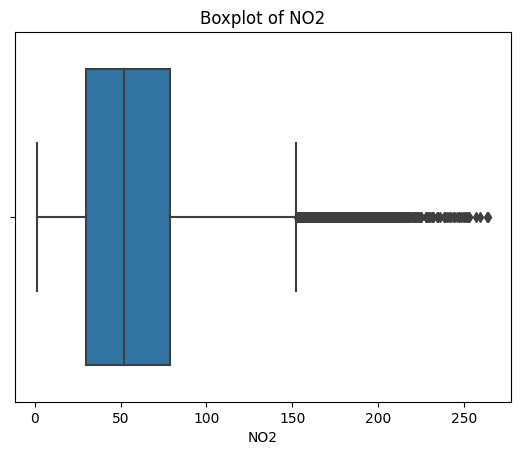

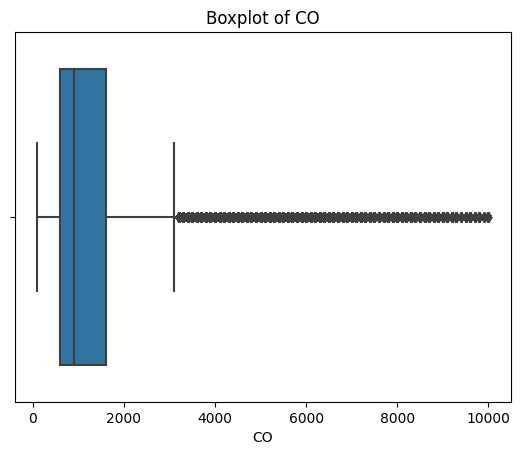

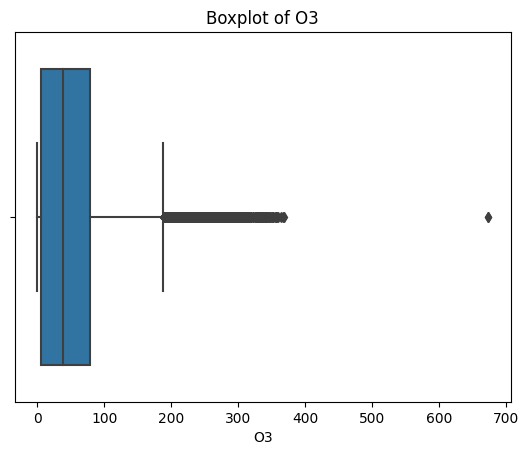

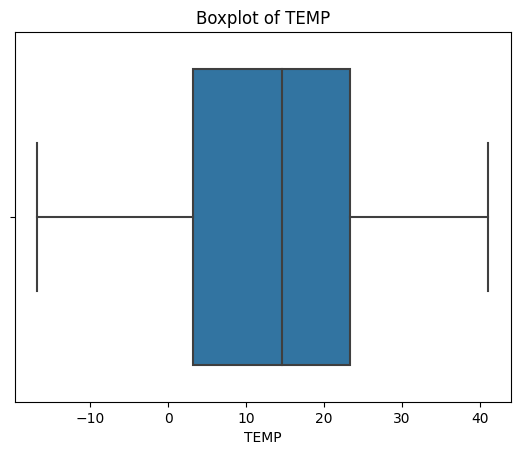

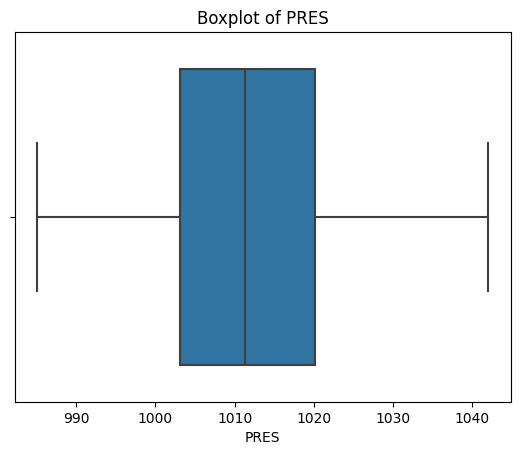

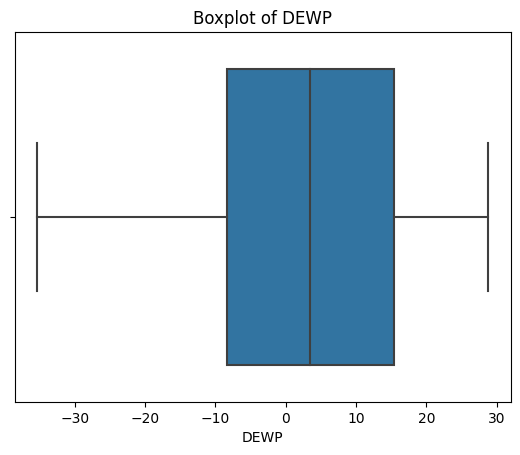

In [24]:
for column in df.columns[6:14]:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


### 3. Cleaning Data

Kesimpulan dari pemeriksaan kelengkapan data adalah bahwa data tersebut mengandung nilai yang hilang dan pencilan yang perlu dibersihkan. Pada sel di bawah ini, saya akan menghapus pencilan menggunakan metode Interquartile Range (IQR) dengan kriteria 25% dan 75% di luar batas data sekaligus membuat distribusi normal dengan skala 1,5. Saya akan melakukan operasi ini hanya pada kolom yang ingin saya gunakan, yaitu kolom 6-14.

In [25]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)
iqr = Q2 - Q1

scale_factor = 2
lower_limit = Q1 - scale_factor * iqr
upper_limit = Q2 + scale_factor * iqr

lower_outliers = (df[df.columns[6:14]] < lower_limit)
upper_outliers = (df[df.columns[6:14]] > upper_limit)


<ipython-input-25-663d36e9f190>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-25-663d36e9f190>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q2 = df.quantile(0.75)
<ipython-input-25-663d36e9f190>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_outliers = (df[df.columns[6:14]] < lower_limit)
<ipython-input-25-663d36e9f190>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will 

Selanjutnya, saya akan memeriksa outlier yang dihitung menggunakan metode IQR untuk kolom 6-14, yang disimpan di `df[df.columns[6:14]]`. Hasil dari perhitungan outlier ini ditampilkan sebagai nilai bukan nol (tidak kosong). Jadi, dengan menggunakan `[lower_outliers | upper_outliers]`, kita dapat mengamati data yang diklasifikasikan sebagai pencilan, baik yang berada di bawah batas bawah (lower_outliers) maupun di atas batas atas (upper_outliers) distribusi.

In [26]:
outlier_rows = df[df.columns[6:14]][(lower_outliers | upper_outliers)]
outlier_rows_info = outlier_rows.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    2109 non-null   float64
 1   SO2     6907 non-null   float64
 2   NO2     599 non-null    float64
 3   CO      5523 non-null   float64
 4   O3      1719 non-null   float64
 5   TEMP    0 non-null      float64
 6   PRES    0 non-null      float64
 7   DEWP    0 non-null      float64
dtypes: float64(8)
memory usage: 6.4 MB


Selanjutnya, saya akan membuat DataFrame baru yang tidak mengandung outlier berdasarkan metode IQR yang telah dihitung sebelumnya.

In [27]:
num_cols = list(df.columns[6:14])
df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * iqr)) |(df[num_cols] > (Q2 + 2 * iqr))).any(axis=1)]
df_out_IQR.info()

<ipython-input-27-662b1e697ece>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * iqr)) |(df[num_cols] > (Q2 + 2 * iqr))).any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92319 entries, 0 to 105191
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       92319 non-null  int64  
 1   year     92319 non-null  int64  
 2   month    92319 non-null  int64  
 3   day      92319 non-null  int64  
 4   hour     92319 non-null  int64  
 5   PM2.5    90631 non-null  float64
 6   PM10     90971 non-null  float64
 7   SO2      90084 non-null  float64
 8   NO2      89874 non-null  float64
 9   CO       88437 non-null  float64
 10  O3       88834 non-null  float64
 11  TEMP     92260 non-null  float64
 12  PRES     92260 non-null  float64
 13  DEWP     92260 non-null  float64
 14  RAIN     92260 non-null  float64
 15  wd       92063 non-null  object 
 16  WSPM     92278 non-null  float64
 17  station  92319 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 13.4+ MB


<ipython-input-27-662b1e697ece>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * iqr)) |(df[num_cols] > (Q2 + 2 * iqr))).any(axis=1)]


Setelah penghapusan pencilan selesai, langkah selanjutnya adalah membersihkan nilai nol dengan mengisinya dengan nilai median. Saya menggunakan median karena median kuat terhadap pencilan dan tidak mempengaruhi distribusi.

In [28]:
df_out_IQR['PM2.5'] = df_out_IQR['PM2.5'].fillna(df_out_IQR['PM2.5'].median())
df_out_IQR['CO'] = df_out_IQR['CO'].fillna(df_out_IQR['CO'].median())
df_out_IQR['PM10'] = df_out_IQR['PM10'].fillna(df_out_IQR['PM10'].median())
df_out_IQR['TEMP'] = df_out_IQR['TEMP'].fillna(df_out_IQR['TEMP'].median())
df_out_IQR['PRES'] = df_out_IQR['PRES'].fillna(df_out_IQR['PRES'].median())
df_out_IQR['DEWP'] = df_out_IQR['DEWP'].fillna(df_out_IQR['DEWP'].median())

<ipython-input-28-102153b9c8cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_IQR['PM2.5'] = df_out_IQR['PM2.5'].fillna(df_out_IQR['PM2.5'].median())
<ipython-input-28-102153b9c8cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_IQR['CO'] = df_out_IQR['CO'].fillna(df_out_IQR['CO'].median())
<ipython-input-28-102153b9c8cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

## C. Exploratory Data Analyst (EDA)

Selanjutnya, saya akan melakukan statistik deskriptif dengan tujuan untuk mendapatkan pemahaman awal tentang distribusi, tendensi sentral, dan karakteristik data dalam kolom yang akan saya gunakan. Ini adalah langkah awal yang penting dalam analisis data untuk mengidentifikasi pola dan tren yang mungkin ada dalam data.

In [29]:
selected_columns = ['PM2.5', 'PM10', 'CO', 'TEMP', 'PRES', 'DEWP']
df_out_IQR[selected_columns].describe()


,PM2.5,PM10,CO,TEMP,PRES,DEWP
count,92319.000000,92319.000000,92319.000000,92319.000000,92319.000000,92319.000000
mean,66.925777,90.938180,1031.535188,14.477891,1011.352813,3.453904
std,60.870685,68.645823,701.233625,11.013275,10.470839,14.004803
min,2.000000,2.000000,100.000000,-16.800000,985.100000,-35.300000
25%,20.000000,36.000000,500.000000,5.000000,1002.800000,-8.300000
50%,50.000000,77.000000,800.000000,16.000000,1010.600000,5.200000
75%,94.000000,129.000000,1300.000000,23.600000,1019.700000,16.000000
max,426.000000,370.000000,3600.000000,40.600000,1042.000000,28.800000


Selanjutnya, saya akan memeriksa rentang waktu (dalam tahun) dalam data secara mendetail dengan mengidentifikasi tahun berapa saja yang ada di dalam kumpulan data.

In [30]:
df_out_IQR['year'].unique()

array([2013, 2014, 2015, 2016, 2017])

Setelah itu, saya berencana untuk membuat histogram yang menggambarkan distribusi data di kolom 'PRES' pada DataFrame df_out_IQR dengan menggunakan Seaborn. Histogram tersebut akan menggambarkan nilai 'PRES' yang tersebar di 9 interval (tempat sampah), dengan garis hitam yang menandai batas-batasnya. Representasi visual ini bertujuan untuk menentukan perkiraan normalitas dari distribusi data dalam kolom 'PRES'.

Text(0, 0.5, 'Count')

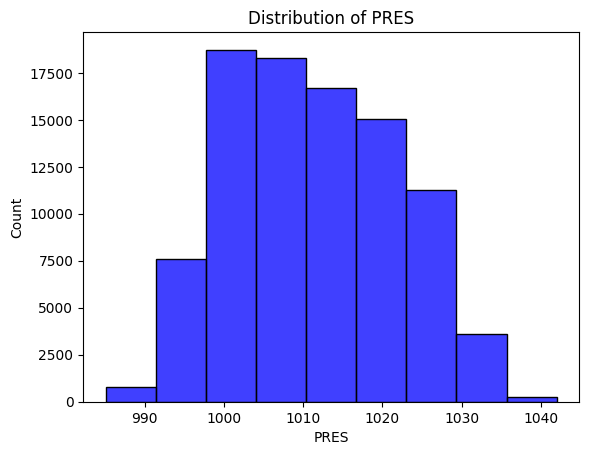

In [31]:
sns.histplot(df_out_IQR['PRES'], bins=9, color='blue', edgecolor='black')
plt.title('Distribution of PRES')
plt.xlabel('PRES')
plt.ylabel('Count')


## D. Visualization & Explanatory Analysis

### Pertanyaan 1: Menganalisis kumpulan data PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Tiantan, Wanliu, dan Changping), bagaimana tren polusi udara selama lima tahun terakhir?


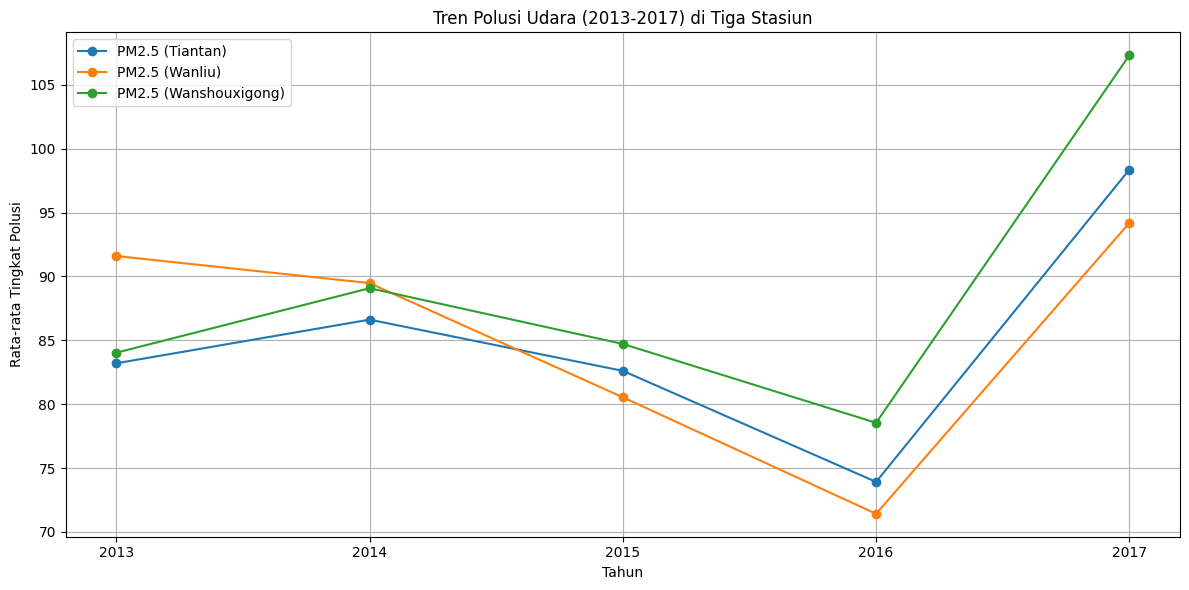

In [32]:
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

plt.figure(figsize=(12, 6))
for station in ['Tiantan', 'Wanliu', 'Wanshouxigong']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['PM2.5'], label=f'PM2.5 ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan plot tren data PM2.5 di atas, kita dapat menyimpulkan hal-hal berikut:
- Tiantan: Terdapat tren penurunan dari tahun 2013 hingga 2016, diikuti dengan peningkatan pada tahun 2017.
- Wanliu: Data menunjukkan fluktuasi dari tahun ke tahun tanpa tren yang jelas.
- Wanshouxigong: Mirip dengan Tiantan, ada tren penurunan dari tahun 2013 hingga 2016, diikuti dengan peningkatan pada tahun 2017.

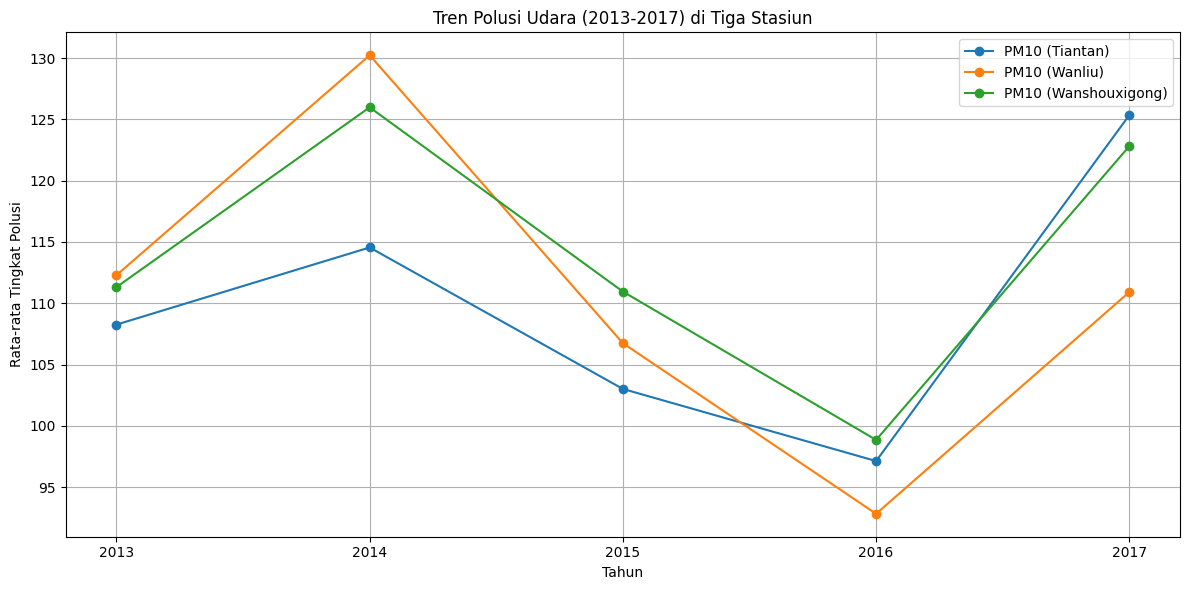

In [33]:
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

plt.figure(figsize=(12, 6))
for station in ['Tiantan', 'Wanliu', 'Wanshouxigong']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['PM10'], label=f'PM10 ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan plot tren data PM10 di atas, dapat ditarik kesimpulan sebagai berikut:
- Tiantan: Terdapat tren penurunan dari tahun 2013 hingga 2016, diikuti dengan peningkatan pada tahun 2017.
- Wanliu: Terdapat tren penurunan dari tahun 2013 hingga 2016, diikuti dengan sedikit peningkatan pada tahun 2017.
- Wanshouxigong: Mirip dengan Tiantan, ada tren penurunan dari tahun 2013 hingga 2016, diikuti dengan sedikit peningkatan pada tahun 2017.

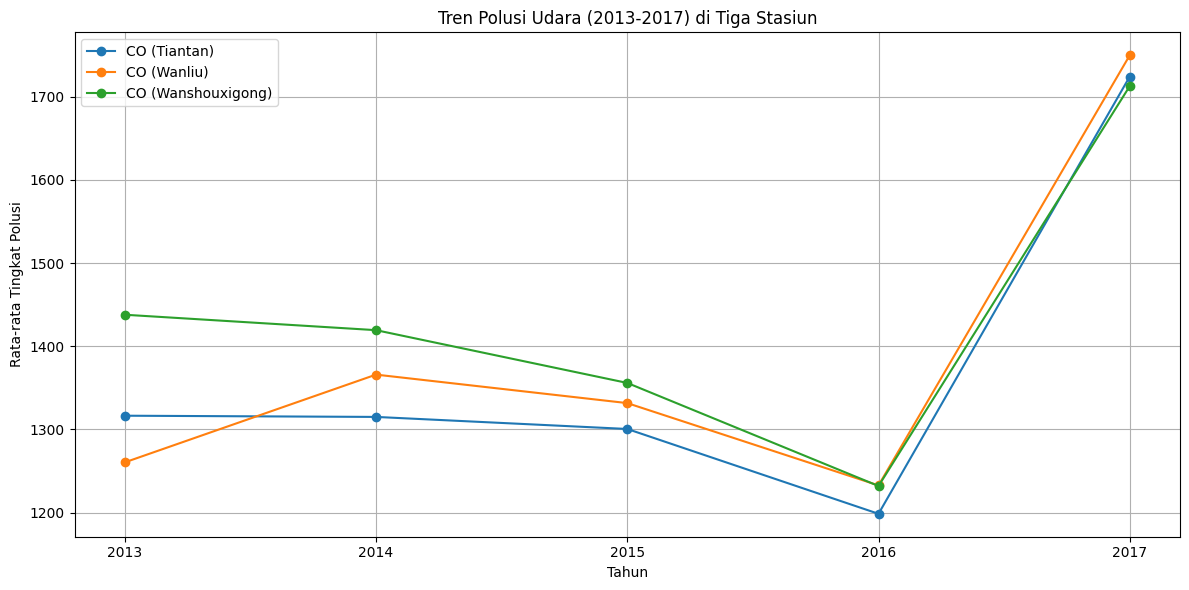

In [34]:
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

plt.figure(figsize=(12, 6))
for station in ['Tiantan', 'Wanliu', 'Wanshouxigong']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['CO'], label=f'CO ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan plot tren data CO di atas, dapat ditarik kesimpulan sebagai berikut:
- Tiantan: Terdapat tren yang jatuh secara bertahap dari tahun ke tahun, namun dengan peningkatan yang tajam pada tahun 2017.
- Wanliu: Terdapat tren yang fluktuatif dari tahun ke tahun dengan peningkatan yang tajam pada tahun 2015 dan 2017.
- Wanshouxigong: Sama seperti stasiun tiantan, terdapat tren yang jatuh secara bertahap dari tahun ke tahun, dengan peningkatan yang tajam pada tahun 2017.

### Pertanyaan 2: Apakah terdapat korelasi antara parameter cuaca, seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP), dengan tingkat polusi PM2.5 dalam lima tahun terakhir?

Pada sel berikut ini, saya akan melakukan analisis korelasi di antara variabel-variabel numerik di dalam set data. Saya hanya akan memilih kolom dengan tipe data numerik dan kemudian membuat peta panas menggunakan Seaborn untuk memvisualisasikan korelasi antara variabel-variabel ini. Peta panas ini memungkinkan saya untuk dengan cepat mengamati hubungan korelasi antara variabel numerik dalam bentuk warna, di mana warna yang lebih cerah menunjukkan korelasi positif, dan warna yang lebih gelap menunjukkan korelasi negatif. Anotasi dengan nilai numerik dalam sel peta panas memberikan nilai korelasi yang spesifik. Hal ini membantu saya memahami hubungan antara variabel dalam dataset, yang dapat menjadi langkah penting dalam analisis data dan pemilihan fitur untuk pemodelan data.

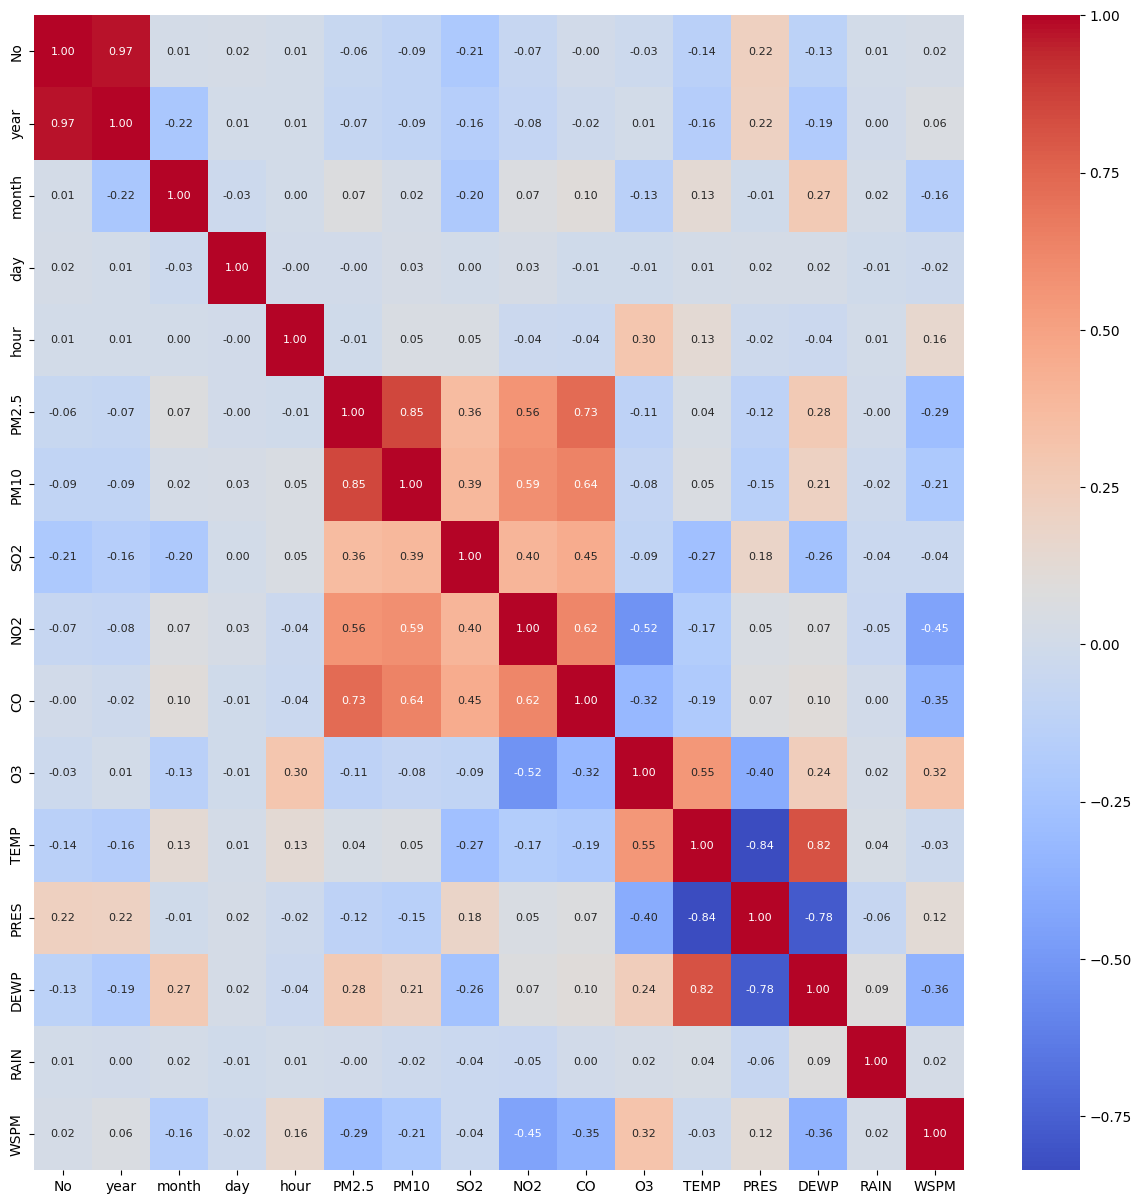

In [35]:
numeric_df = df_out_IQR.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.show()

Selanjutnya, saya akan membuat sebuah pairplot, yang merupakan sebuah visualisasi yang memungkinkan kita untuk melihat hubungan antara kolom-kolom yang dipilih dalam DataFrame secara bersamaan. Kolom yang saya pilih dalam kode ini adalah 'PM2.5', 'TEMP' (suhu), 'PRES' (tekanan udara), dan 'DEWP' (titik embun). Dengan menggunakan Seaborn, saya dapat melihat serangkaian scatter plot di antara semua kombinasi pasangan kolom ini. Setiap scatter plot menggambarkan hubungan antara dua kolom, sedangkan diagonal dari pairplot menampilkan distribusi univariat dari setiap kolom. Tujuan dari visualisasi ini adalah untuk memberikan wawasan awal tentang bagaimana variabel-variabel ini berinteraksi satu sama lain dan apakah ada pola atau tren yang terlihat dalam data.

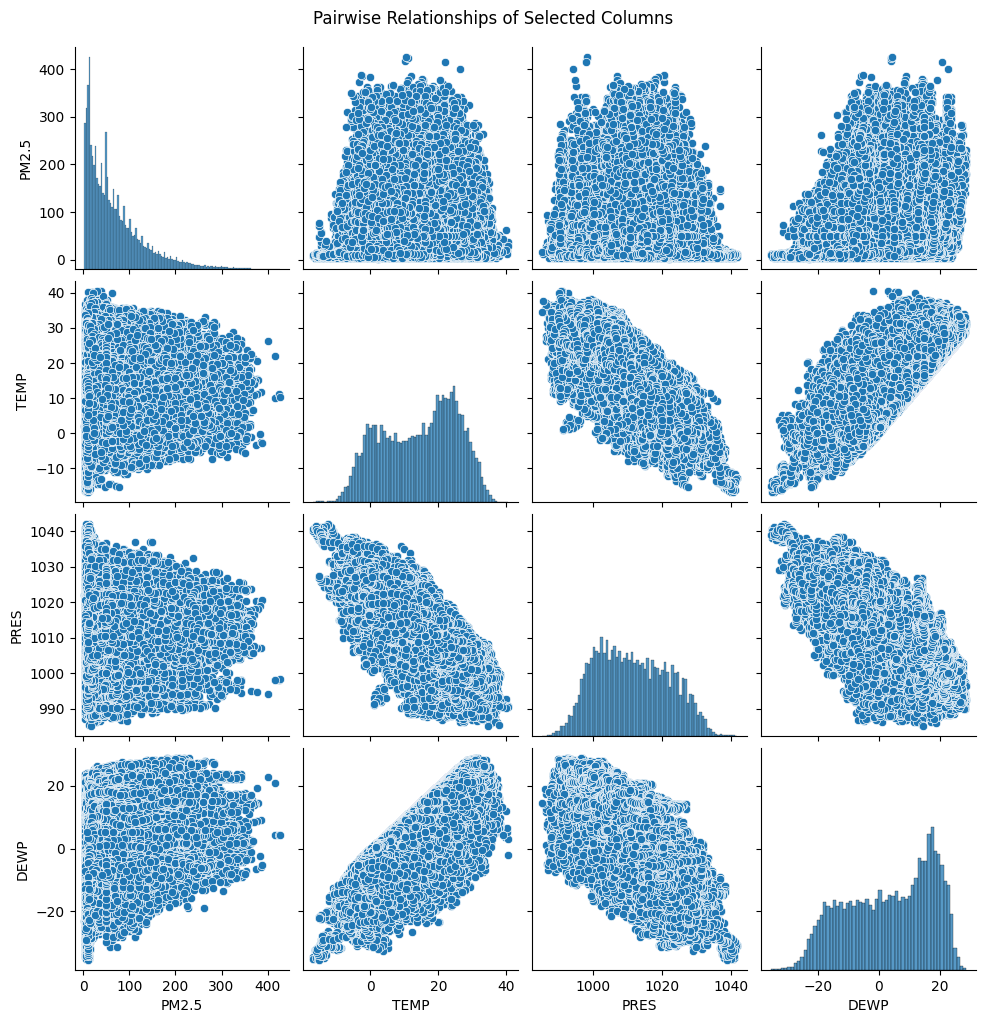

In [36]:
selected_columns = df_out_IQR[['PM2.5', 'TEMP', 'PRES', 'DEWP']]
sns.pairplot(selected_columns)
plt.suptitle('Pairwise Relationships of Selected Columns', y=1.02)
plt.show()


Selanjutnya, saya akan membuat plot regresi linier menggunakan Seaborn dengan sumbu x ('TEMP' atau suhu) dan sumbu y ('PM2.5' atau partikulat PM2.5) dari DataFrame `df_out_IQR`. Tujuannya adalah untuk memvisualisasikan hubungan antara variabel 'TEMP' dan 'PM2.5' dan melihat apakah ada tren linier di antara keduanya. Plot ini dapat membantu saya mengeksplorasi bagaimana perubahan suhu berhubungan dengan perubahan tingkat materi partikulat PM2.5 dalam dataset dan apakah hubungan ini dapat dijelaskan dengan regresi linier.

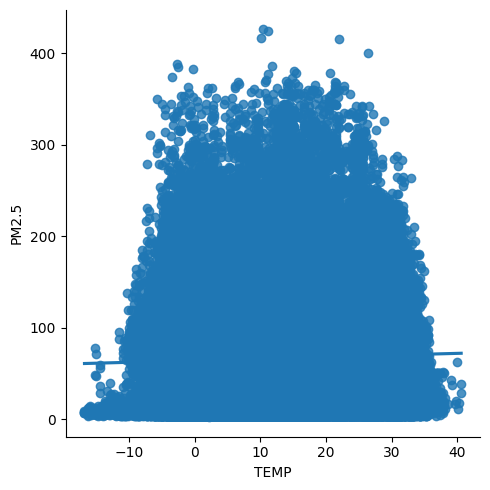

In [37]:
sns.lmplot(x='TEMP',y='PM2.5', data = df_out_IQR)

Selanjutnya, saya akan membuat plot regresi linier menggunakan Seaborn dengan sumbu x ('PRES' atau tekanan udara) dan sumbu y ('PM2.5' atau partikulat PM2.5) dari DataFrame `df_out_IQR`. Tujuannya adalah untuk memvisualisasikan hubungan antara variabel 'PRES' dan 'PM2.5' dan melihat apakah ada tren linier di antara keduanya. Plot ini dapat membantu saya mengeksplorasi bagaimana perubahan tekanan udara berhubungan dengan perubahan tingkat materi partikulat PM2.5 dalam dataset dan apakah hubungan ini dapat dijelaskan dengan regresi linier.

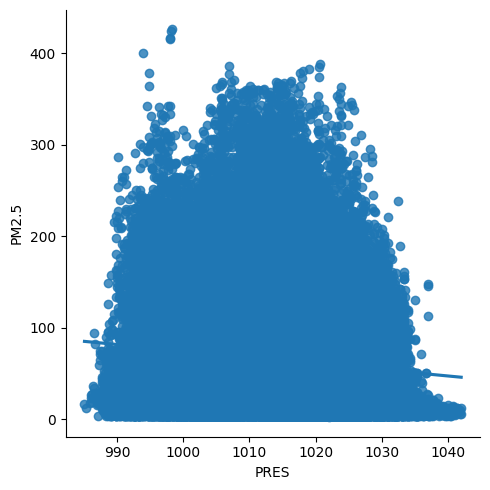

In [38]:
sns.lmplot(x='PRES',y='PM2.5', data = df_out_IQR)

Selanjutnya, saya akan membuat plot regresi linier menggunakan Seaborn dengan sumbu x ('DEWP' atau titik embun) dan sumbu y ('PM2.5' atau partikulat PM2.5) dari DataFrame `df_out_IQR`. Tujuannya adalah untuk memvisualisasikan hubungan antara variabel 'DEWP' dan 'PM2.5' dan melihat apakah ada tren linier di antara keduanya. Plot ini dapat membantu saya mengeksplorasi bagaimana perubahan titik embun berhubungan dengan perubahan tingkat partikulat PM2.5 dalam dataset dan apakah hubungan ini dapat dijelaskan dengan regresi linier.

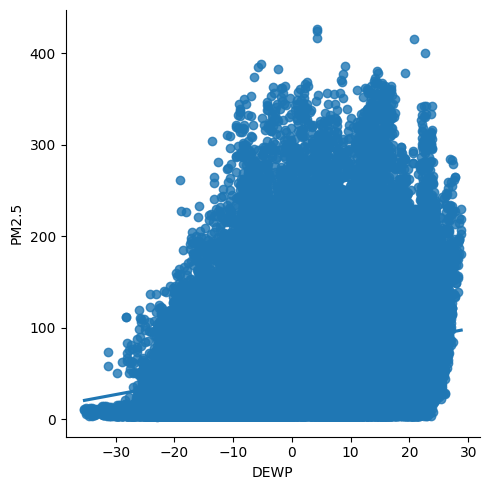

In [39]:
sns.lmplot(x='DEWP',y='PM2.5', data = df_out_IQR)

## E. Conclusion

###Pertanyaan 1 (Conclusion):
>Berdasarkan set data PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Dingling, Aotizhongxin, dan Changping), bagaimana tren polusi udara selama lima tahun terakhir?

>Berdasarkan analisis yang dilakukan pada sel sebelumnya, polusi udara di tiga stasiun ini memiliki tren yang berbeda selama lima tahun terakhir dimana Data PM2.5, PM10, dan CO menunjukkan bahwa polusi udara di tiga stasiun (Tiantan, Wanliu, dan Wanshouxigong) mengalami penurunan dari tahun 2013 hingga 2016, namun meningkat kembali pada tahun 2017.

> Stasiun Tiantan dan Wanshouxigong memiliki p Secara umum, polusi udara menurun dari tahun 2013 hingga 2016, namun meningkat pada tahun 2017. Parameter CO menunjukkan peningkatan yang paling tajam pada tahun 2017 di semua stasiun. Parameter PM2.5 dan PM10 menunjukkan tren yang mirip di stasiun Tiantan dan Wanshouxigong, namun berbeda di stasiun Wanliu. Stasiun Wanliu juga menunjukkan fluktuasi yang lebih tinggi untuk parameter CO dibandingkan dengan stasiun lainnya.

> Peningkatan polusi udara pada tahun 2017 mungkin disebabkan oleh faktor-faktor seperti aktivitas manusia, kondisi cuaca, atau perubahan kebijakan lingkungan.

>Dari analisis di atas, kita dapat melihat bahwa stasiun Tiantan memiliki nilai rata-rata yang paling rendah untuk ketiga parameter polusi udara, yang berarti bahwa stasiun ini memiliki kondisi yang lebih baik dibandingkan dengan dua stasiun lainnya. Stasiun Wanliu memiliki nilai rata-rata yang paling tinggi untuk parameter PM10 dan CO, sedangkan stasiun Wanshouxigong memiliki nilai rata-rata yang paling tinggi untuk parameter PM2.5. Oleh karena itu, stasiun Tiantan adalah stasiun yang paling sehat untuk tinggal di dekatnya.


###Pertanyaan 2 (Conclusion):

> Apakah terdapat korelasi antara parameter cuaca seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) dengan tingkat polusi PM2.5 selama lima tahun terakhir?

> Dari nilai korelasi yang diperoleh:
- PM2.5 dengan TEMP = 0.04
- PM2.5 dengan PRES = -0.12
- PM2.5 dengan DEWP = 0.28
>Dapat disimpulkan bahwa nilai korelasi yang rendah (mendekati nol) mengindikasikan bahwa hubungan antara parameter cuaca (suhu, tekanan udara, kelembaban udara) dengan tingkat pencemaran PM2.5 sangat lemah. Berikut adalah penjelasannya secara rinci:


>1. **Suhu (TEMP) **: Korelasi antara suhu dan PM2.5 sangat rendah (0.04). Ini berarti bahwa perubahan suhu tidak secara signifikan mempengaruhi tingkat polusi PM2.5 selama lima tahun terakhir.

>2. **Tekanan Udara (PRES): Korelasi antara tekanan udara dan PM2.5 juga rendah (-0.12). Hal ini menunjukkan bahwa tidak ada hubungan yang kuat antara tekanan udara dan tingkat polusi PM2.5. Korelasi negatif yang lemah menunjukkan bahwa peningkatan tekanan udara tidak secara signifikan mengurangi tingkat polusi PM2.5.

>3. **Kelembaban (DEWP)**: Korelasi antara kelembaban dan PM2.5 sedikit lebih tinggi (0.28), tetapi masih termasuk dalam kategori korelasi rendah. Hal ini dapat menunjukkan bahwa terdapat sedikit hubungan positif antara kelembaban dan tingkat polusi PM2.5, namun korelasi ini masih lemah untuk dianggap sebagai faktor utama yang mempengaruhi polusi PM2.5.

>Jadi, berdasarkan nilai korelasi tersebut, dapat disimpulkan bahwa hubungan antara parameter cuaca (suhu, tekanan udara, kelembaban) dan tingkat polusi PM2.5 selama lima tahun terakhir sangat lemah. Faktor-faktor lain mungkin memiliki pengaruh yang lebih besar terhadap tingkat polusi PM2.5, atau mungkin ada faktor non-linear atau faktor eksternal yang tidak tertangkap dalam analisis korelasi ini yang mempengaruhi polusi PM2.5. Oleh karena itu, analisis lebih lanjut mungkin diperlukan untuk lebih memahami faktor-faktor yang mempengaruhi tingkat polusi PM2.5.


In [ ]:
from google.colab import files

df_out_IQR.to_csv('main_data.csv', index=False)
files.download('main_data.csv')